<a href="https://colab.research.google.com/github/MilixUK/AssemblerExample/blob/master/Stacked_plot_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
# 1. Import CSI data, convert into amplitude and phase and display as charts
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/EmptyCar_1.csv')
import math
import collections
import matplotlib.pyplot as plt
import numpy as np



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
#2. Read data from the whole CSV
csi_frame_lines = []
csi_data = []
for value in df['CSI_DATA']:

    line = value.replace("[", "").replace("]", "")
    line_array = line.split()  # or line.split(',')
    # Append the resulting array to csi_data
    csi_data.append(line_array)

# create a DataFrame out of the CSI array
dz = pd.DataFrame(csi_data)
dz.fillna(0)
dz.head()



,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,84,-64,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84,-64,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,84,-64,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84,-64,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,84,-64,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
#3. Transfrom into amplitudes and phases
subcarrier = 44



def find_indexes(carrier):
  index_a = (carrier *2) -1
  index_b = index_a -1
  return index_a, index_b
index_real, index_imaginary = find_indexes(subcarrier) # imagnary index must be divisible by 2



In [169]:
perm_amp = collections.deque(maxlen=1000)
perm_phase = collections.deque(maxlen=1000)
num_rows = len(dz)
amplitudes = []
phases = []
dz.at[index_real, 1]
type(dz.at[index_real, 1])


str

In [170]:
imaginary_values = []
real_values = []
def column_to_array(df, column_index):
    # Get the column values
    column_values = df.iloc[:, column_index]

    # Convert the column values to a flat list
    values_list = column_values.values.flatten().tolist()

    return values_list

imaginary_values = column_to_array(dz,index_imaginary )
imaginary_values_clr = [x if x is not None else 0 for x in imaginary_values]
imaginary_values_clr_int = [int(x) for x in imaginary_values_clr]
real_values = column_to_array(dz,index_real )
real_values_clr = [x if x is not None else 0 for x in real_values]
real_values_clr_int = [int(x) for x in real_values_clr]

def calculate_amplitudes(arr_img, arr_real):
  amplitudes = []
  iterator = range(len(arr_img)- 1)
  for i in iterator:
    amplitude_calc = math.sqrt(arr_img[i] ** 2 + arr_real[i] ** 2)
    amplitudes.append(amplitude_calc)
  return amplitudes
def calculate_phases(arr_img, arr_real):
  phases = []
  iterator = range(len(arr_img)- 1)
  for i in iterator:
    phase_calc = math.atan2(arr_img[i], arr_real[i] )
    phases.append(phase_calc)
  return phases

amplitudes = calculate_amplitudes(imaginary_values_clr_int, real_values_clr_int)
phases= calculate_phases(imaginary_values_clr_int, real_values_clr_int)
print(phases)

[1.2722973952087173, 1.176005207095135, -1.4288992721907328, 1.965587446494658, 0.0, 2.5127963671743605, 2.44685437739309, 2.3086113869153615, 0.9420000403794636, -2.0344439357957027, -2.988943325194528, 2.0344439357957027, -2.999695598985629, -2.746801533890032, -3.070285188804503, -1.7818896600176433, 1.3045442776439713, 2.137525544318403, -2.782821983319221, -1.1071487177940904, 2.297438667476622, 0.8960553845713439, 0.7328151017865066, 0.83798122500839, 0.0, -1.9138202672156, 2.137525544318403, -0.3217505543966422, -0.43240777557053783, 1.4940244355251187, 0.2984989315861793, 0.3947911196997615, -2.256525837701183, 0.15264932839526515, 2.8632929945846817, 2.819842099193151, -2.399645385583876, -0.5880026035475675, 1.3439974787410107, -2.408777551803287, 0.982793723247329, 0.15264932839526515, 0.5667292175235064, 0.13255153229667402, -2.0344439357957027, -1.2277723863741932, -1.3439974787410107, -2.007423486608438, 0.3430239404207034, 2.761086276477428, 0.628796286415433, -1.5707963

In [171]:
len(phases) == len(amplitudes)

True

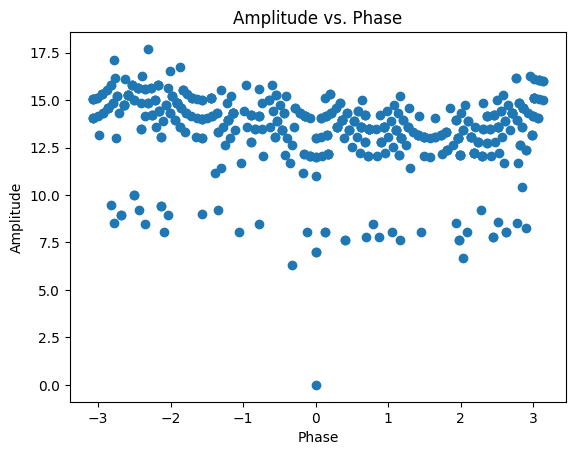

In [172]:
#4. Show it on a chart

def carrier_plot(amp, phs):
 # df = np.asarray(amp, dtype=np.int32)
 plt.scatter(phs, amp)
 plt.xlabel('Phase')
 plt.ylabel('Amplitude')
 plt.title('Amplitude vs. Phase')
 plt.show()

carrier_plot(amplitudes, phases)
